# Final Project for Machine Learning: Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

## Importing the data set

In [2]:
path = 'California_Houses.csv'
data = pd.read_csv(path)
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


## Removing outliers

In [3]:
df = data
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [4]:
df.dtypes

Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Latitude                    float64
Longitude                   float64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object

In [5]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


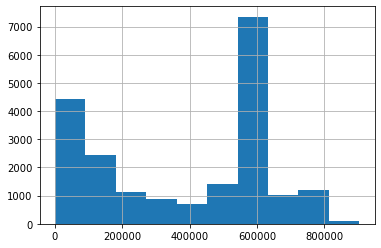

In [6]:
df['Distance_to_SanFrancisco'].hist()

## Checking if we have any missing values

In [7]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

## Separating data into X and y

In [8]:
y_col = 'Median_House_Value'
X = df.drop(y_col, axis=1)
y = df[y_col]

## Applying abs() on negative data points

In [9]:
X['Latitude'] = X['Latitude'].abs()
X['Longitude'] = X['Longitude'].abs()

## Applying log10 on every column

In [10]:
for col in X.columns:
    X[col]  = X[col].apply(np.log1p)  # same thing

## Linear Regression

In [11]:
s = StandardScaler()
lr = LinearRegression()
minmax = MinMaxScaler()
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
estimator_1 = Pipeline([("minmax", minmax),
                      ("regression", lr)])

predictions = cross_val_predict(estimator_1, X, y, cv=kf)

r2_score(y, predictions)

0.6633690602875023

## Ridge Regression

In [12]:
estimator = Pipeline([("minmax", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.001, 10, 200)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [13]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.00000000e-03, 1.04737090e-03, 1.09698580e-03, 1.14895100e-03,
       1.20337784e-0...
       3.44896226e+00, 3.61234270e+00, 3.78346262e+00, 3.96268864e+00,
       4.15040476e+00, 4.34701316e+00, 4.55293507e+00, 4.76861170e+00,
       4.99450512e+00, 5.23109931e+00, 5.47890118e+00, 5.73844165e+00,
       6.01027678e+00, 6.29498899e+00, 6.59318827e+00, 6.90551352e+00,
       7.23263390e+00, 7.57525026e+00, 7.93409667e+00, 8.30994195e+00,
       8.70359136e+00, 9.11588830e+00, 9.54771611e+00, 1.00000000e+01])})

In [14]:
grid.best_score_, grid.best_params_

(0.7921810836936932,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 0.001})

### R^2 scores

#### First score
##### Used StandardScaler() and a different range of alphas

#### Second score
##### Used MinMaxScaler() and alphas = np.geomspace(0.001, 10, 200)

#### Third score

##### Used MinMaxScaler() and alphas = np.geomspace(0.001, 10, 200) and applied abs() to negative features then applied log10 

In [15]:
y_predict = grid.predict(X)
r2_score(y, y_predict)

0.8128067530709002

In [28]:
scaler = grid.best_estimator_.named_steps['ridge_regression']

In [ ]:
scaler.coef_

In [ ]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge regression')

ax1.set_xticks(range(len(lr.coef_)));

In [15]:
estimator = Pipeline([("minmax", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("elastic", ElasticNet())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'elastic__alpha': np.geomspace(0.001, 10, 200),
    'elastic__l1_ratio': np.linspace(0.1, 0.9, 9)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
y_predict = grid.predict(X)
r2_score(y, y_predict)